In [1]:
import pandas as pd

c:\Users\82106\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\82106\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
file_path = r'C:\Users\82106\Desktop\안산 공모전\데이터\경기도 안산시_특정토양오염 관리대상시설 현황_20240709.csv'
df_soil = pd.read_csv(file_path, encoding='cp949')

In [3]:
# 소재지에서 동 정보 추출
df_soil['동'] = df_soil['소재지'].str.extract(r'(\S+동)')
df_soil['동'] = df_soil['동'].str.replace(r'[\(\)]', '', regex=True).str.strip()

# 동 이름 앞의 숫자 제거
df_soil['동'] = df_soil['동'].str.replace(r'^\d+', '', regex=True).str.strip()

# NaN, '동', 'B동' 등을 '기타'로 대체
df_soil['동'] = df_soil['동'].fillna('기타')  # NaN을 '기타'로 대체
df_soil['동'] = df_soil['동'].replace(['동', 'B동', 'A동', 'C동'], '기타') 

In [4]:
print(df_soil.isnull().sum())

신고번호       0
상호명        0
대표자        0
구분         0
소재지        0
데이터기준일자    0
동          0
dtype: int64


In [5]:
df_soil

,신고번호,상호명,대표자,구분,소재지,데이터기준일자,동
0,1996-00001,에이치디현대오일뱅크㈜직영 동양주유소,대표이사,주유소,경기도 안산시 단원구 신길동 786-1,2024-07-09,신길동
1,1996-00002,태하셀프주유소,"이진성,채헌옥",주유소,경기도 안산시 상록구 장상동 115-4,2024-07-09,장상동
2,1996-00003,㈜서율주유소 안산,대표이사,주유소,경기도 안산시 상록구 팔곡2동 445-4,2024-07-09,팔곡2동
3,1996-00004,대상주유소,박진승,주유소,경기도 안산시 단원구 선부동 459-1,2024-07-09,선부동
4,1996-00005,㈜성홍 안산터미널주유소,대표이사,주유소,경기도 안산시 상록구 성포동 590,2024-07-09,성포동
...,...,...,...,...,...,...,...
187,2023-00002,강남화성㈜반월2공장,대표이사,산업시설,경기도 안산시 단원구 신원로 117,2024-07-09,기타
188,2023-00003,에이치엘위코㈜,대표이사,산업시설,경기도 안산시 단원구 해봉로255번길 4,2024-07-09,기타
189,2024-00001,㈜창강화학(장자골로 36),대표이사,산업시설,경기도 안산시 단원구 장자골로 36,2024-07-09,기타
190,2024-00002,제이투에이치바이오텍㈜,대표이사,산업시설,"경기도 안산시 단원구 산단로 349, B동",2024-07-09,기타


In [6]:
import matplotlib.pyplot as plt

# 동별 시설 개수 집계
dong_counts = df_soil['동'].value_counts()
print("동별 시설 개수:\n", dong_counts)

동별 시설 개수:
 동
성곡동     41
목내동     23
기타      21
원시동     20
신길동     15
선부동      9
사동       6
월피동      5
대부동동     4
부곡동      3
초지동      3
대부북동     3
사사동      3
고잔동      3
선감동      3
건건동      2
원곡동      2
본오동      2
팔곡2동     2
양상동      2
일동       2
팔곡일동     2
와동       2
이동       2
사2동      1
본오2동     1
대부남동     1
팔곡이동     1
풍도동      1
성포동      1
원곡1동     1
팔곡1동     1
장하동      1
수암동      1
장상동      1
본오1동     1
Name: count, dtype: int64


In [7]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

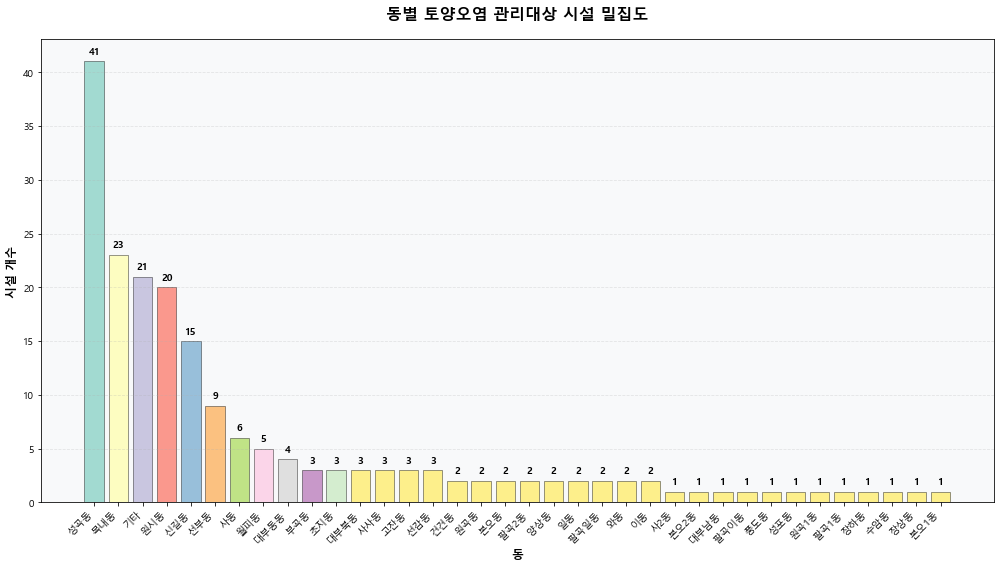

In [8]:
plt.figure(figsize=(14, 8))

# 색상 팔레트 설정
colors = plt.cm.Set3(range(len(dong_counts)))

# 막대그래프 생성
bars = plt.bar(dong_counts.index, dong_counts.values, 
               color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
# 제목과 라벨 설정
plt.title('동별 토양오염 관리대상 시설 밀집도', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('동', fontsize=12, fontweight='bold')
plt.ylabel('시설 개수', fontsize=12, fontweight='bold')

# 축 스타일링
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# 배경색 설정
plt.gca().set_facecolor('#f8f9fa')

# 여백 조정
plt.tight_layout()
plt.show()

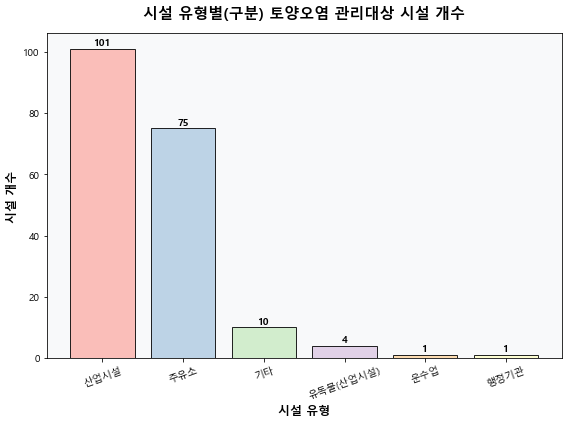

In [9]:
facility_counts = df_soil['구분'].value_counts()

plt.figure(figsize=(8, 6))
colors = plt.cm.Pastel1(range(len(facility_counts)))
bars = plt.bar(facility_counts.index, facility_counts.values, color=colors, edgecolor='black', alpha=0.85)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
plt.title('시설 유형별(구분) 토양오염 관리대상 시설 개수', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('시설 유형', fontsize=12, fontweight='bold')
plt.ylabel('시설 개수', fontsize=12, fontweight='bold')
plt.xticks(rotation=20)
plt.gca().set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

In [10]:
dong_counts = df_soil.groupby('동')['동'].transform('count')
df_soil['토양오염 관리시설 개수'] = dong_counts

In [11]:
dong_facility_count = df_soil.groupby('동').size().reset_index(name='토양오염 관리시설 개수')
dong_facility_count

,동,토양오염 관리시설 개수
0,건건동,2
1,고잔동,3
2,기타,21
3,대부남동,1
4,대부동동,4
5,대부북동,3
6,목내동,23
7,본오1동,1
8,본오2동,1
9,본오동,2


### merged_dong_data 데이터와 병합

In [12]:
# 동명에서 숫자 제거하여 통일
dong_facility_count['동'] = dong_facility_count['동'].str.replace(r'(\w+)\d+동', r'\1동', regex=True)

# 동일한 동명으로 통일된 것들을 합계 처리
dong_facility_count = dong_facility_count.groupby('동')['토양오염 관리시설 개수'].sum().reset_index()

In [13]:
# 동별 토양오염 관리시설 통합 및 재집계
def integrate_dong_regions(dong_facility_count):
    # 동별 통합 규칙 정의
    integration_rules = {
        #  섬 지역 통합 - 대부동
        '대부남동': '대부동',
        '대부동동': '대부동', 
        '대부북동': '대부동',
        '선감동': '대부동',
        '풍도동': '대부동',
        
        # 과거 중심지 통합 - 안산동
        '수암동': '안산동',
        '장상동': '안산동',
        '장하동': '안산동',
        '목내동': '안산동',
        '양상동': '안산동',
        
        #  산업단지 관련 통합 - 반월동
        '건건동': '반월동',
        '사사동': '반월동',
        
        # 성포동 통합
        '성곡동': '성포동',
        
        # 구릉지 통합 - 이동
        '팔곡동': '이동',
        '팔곡이동': '이동',
        '팔곡일동': '이동',
        
        # 신도시 지역 - 호수동
        '원시동': '호수동',

        # 원곡동 통합
        '신길동': '원곡동'
    }
    
    # 동명 매핑 적용
    dong_facility_count['통합동'] = dong_facility_count['동'].map(integration_rules).fillna(dong_facility_count['동'])
    
    # 통합된 동별로 시설 개수 합계
    integrated_count = dong_facility_count.groupby('통합동')['토양오염 관리시설 개수'].sum().reset_index()
    integrated_count.columns = ['동', '토양오염 관리시설 개수']
    
    return integrated_count.sort_values('토양오염 관리시설 개수', ascending=False)

# 통합 적용
dong_facility_integrated = integrate_dong_regions(dong_facility_count)

dong_facility_integrated = dong_facility_integrated[dong_facility_integrated['동'] != '기타']

In [14]:
dong_facility_integrated.sort_values('토양오염 관리시설 개수', ascending=False)

,동,토양오염 관리시설 개수
8,성포동,42
9,안산동,28
16,호수동,20
11,원곡동,18
2,대부동,12
7,선부동,9
13,이동,8
6,사동,7
3,반월동,5
12,월피동,5


In [15]:
merged_dong_data = pd.read_csv('merged_dong_data.csv', encoding='utf-8-sig')

In [16]:
merged_dong_data

,동,음식물 폐기물 총무게,대형폐기물 관리주소 개수
0,고잔동,3145708.8,132.0
1,대부동,5703940.0,560.0
2,반월동,1239451.2,92.0
3,백운동,2176200.0,106.7
4,본오동,2502583.2,301.0
5,부곡동,1739120.8,109.0
6,사동,5834368.8,232.0
7,선부동,4966509.6,183.0
8,성포동,2664230.4,22.0
9,안산동,147888.0,86.0


In [17]:
# dong_facility_integrated와 merged_dong_data 병합
final_merged_data = pd.merge(
    merged_dong_data, 
    dong_facility_integrated, 
    on='동', 
    how='outer'
).fillna(0)

final_merged_data

,동,음식물 폐기물 총무게,대형폐기물 관리주소 개수,토양오염 관리시설 개수
0,고잔동,3145708.8,132.0,3.0
1,대부동,5703940.0,560.0,12.0
2,반월동,1239451.2,92.0,5.0
3,백운동,2176200.0,106.7,0.0
4,본오동,2502583.2,301.0,4.0
5,부곡동,1739120.8,109.0,3.0
6,사동,5834368.8,232.0,7.0
7,선부동,4966509.6,183.0,9.0
8,성포동,2664230.4,22.0,42.0
9,안산동,147888.0,86.0,28.0


In [18]:
# 하천점용허가 현황 데이터 불러오기
file_river = r'C:\Users\82106\Desktop\안산 공모전\데이터\경기도 안산시_하천점용허가 현황_20250430.csv'
df_river = pd.read_csv(file_river, encoding='cp949')

df_river

,과목명,하천명,부과대상 소재지주소,점용면적(제곱미터),점용목적,데이터기준일자
0,하천점용,안산천,경기도 안산시상록구 장하동 263번지,1517.0,(하천법)농작물의 경작을 목적으로 하는 점용,2025-04-30
1,하천점용,안산천,경기도 안산시단원구 고잔동 570번지 2호,41.0,(하천법)일반 공작물,2025-04-30
2,하천점용,반월천,경기도 안산시상록구 팔곡일동 457번지 6호,89.0,(하천법)일반 공작물,2025-04-30
3,하천점용,건건천,경기도 안산시상록구 건건동 920번지 31호,38.0,(하천법)일반 공작물,2025-04-30
4,하천점용,안산천,경기도 안산시상록구 월피동 536번지 45호,22.0,(하천법)일반 공작물,2025-04-30
...,...,...,...,...,...,...
312,소하천점용,분지천,경기도 안산시 단원구 대부동동,12.0,(소하천법)관로 등의 매설을 위한 점용,2025-04-30
313,소하천점용,분지천,경기도 안산시 단원구 대부동동,12.0,(소하천법)관로 등의 매설을 위한 점용,2025-04-30
314,소하천점용,신길2천,경기도 안산시 단원구 신길동 1542,2.0,(소하천법)그 밖의 목적을 위한 점용,2025-04-30
315,소하천점용,제기천,경기도 안산시 단원구 신길동,120.0,(소하천) 일반 공작물,2025-04-30


In [19]:
# 특정 점용목적명을 '기타'로 변경
df_river['점용목적'] = df_river['점용목적'].replace(
    '스케이트장, 유선장, 도선장 및 계류장(유,도선의 모선을 포함하며, 유선장, 도선장 및 계류장은 부유식인 경우로 한정한다), 운동장, 풀장, 대기장 및 탈의장(매점을 포함한다)',
    '기타'
)

# 점용목적별 개수 집계
purpose_counts = df_river['점용목적'].value_counts()

purpose_counts

점용목적
(하천법)일반 공작물                 111
(하천법)그 밖의 목적을 위한 점용          84
(하천법)관로 등의 매설을 위한 점용         58
(하천법)농작물의 경작을 목적으로 하는 점용     29
전주                            9
(소하천법)그 밖의 목적을 위한 점용          8
(소하천법)관로 등의 매설을 위한 점용         7
(하천법)야적장을 위한 점용               2
(소하천법)공업용수                    2
(하천법)식물의 식재를 목적으로 하는 점용       2
(소하천) 일반 공작물                  2
(하천법)집합건물                     1
기타                            1
기타점용                          1
Name: count, dtype: int64

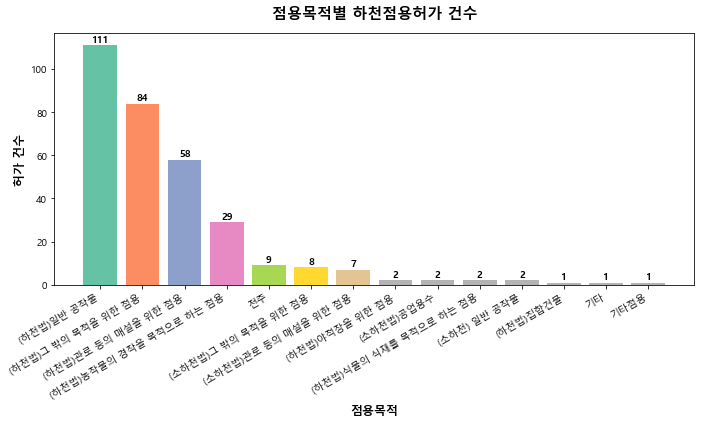

In [20]:
plt.figure(figsize=(10, 6))
bars = plt.bar(purpose_counts.index, purpose_counts.values, color=plt.cm.Set2(range(len(purpose_counts))))

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.title('점용목적별 하천점용허가 건수', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('점용목적', fontsize=12, fontweight='bold')
plt.ylabel('허가 건수', fontsize=12, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# '공업용수' 점용목적의 '부과대상 소재지주소' 값 확인
a=df_river[df_river['점용목적'] == '(소하천법)공업용수']['부과대상 소재지주소']
b=df_river[df_river['점용목적'] == '(하천법)야적장을 위한 점용']['부과대상 소재지주소']
c=df_river[df_river['점용목적'] == '(하천법)집합건물']['부과대상 소재지주소']

dong_info_a = a.str.extract(r'(\S+동)')
dong_info_b = b.str.extract(r'(\S+동)')
dong_info_c = c.str.extract(r'(\S+동)')

# 동명 통합 규칙 적용
dong_info_a[0] = dong_info_a[0].replace({
    '팔곡일동': '이동',
    '장하동': '안산동',
    '사사동': '반월동'
})
dong_info_b[0] = dong_info_b[0].replace({
    '팔곡일동': '이동',
    '장하동': '안산동',
    '사사동': '반월동'
})
dong_info_c[0] = dong_info_c[0].replace({
    '팔곡일동': '이동',
    '장하동': '안산동',
    '사사동': '반월동'
})

print(dong_info_a)
print(dong_info_b)
print(dong_info_c)

      0
148  이동
163  이동
       0
32   안산동
202  반월동
      0
105  이동


In [22]:
final_merged_data['하천 점용 개수'] = 0

# 이동 3, 안산동 1, 반월동 1로 값 추가 또는 갱신
final_merged_data.loc[final_merged_data['동'] == '이동', '하천 점용 개수'] = 3
final_merged_data.loc[final_merged_data['동'] == '안산동', '하천 점용 개수'] = 1
final_merged_data.loc[final_merged_data['동'] == '반월동', '하천 점용 개수'] = 1

In [23]:
final_merged_data

,동,음식물 폐기물 총무게,대형폐기물 관리주소 개수,토양오염 관리시설 개수,하천 점용 개수
0,고잔동,3145708.8,132.0,3.0,0
1,대부동,5703940.0,560.0,12.0,0
2,반월동,1239451.2,92.0,5.0,1
3,백운동,2176200.0,106.7,0.0,0
4,본오동,2502583.2,301.0,4.0,0
5,부곡동,1739120.8,109.0,3.0,0
6,사동,5834368.8,232.0,7.0,0
7,선부동,4966509.6,183.0,9.0,0
8,성포동,2664230.4,22.0,42.0,0
9,안산동,147888.0,86.0,28.0,1


In [24]:
# final_merged_data를 CSV 파일로 저장
final_merged_data.to_csv('merged_data.csv', encoding='utf-8-sig', index=False)

In [78]:
# 토양오염실태조사 결과 데이터 불러오기
file_soil_survey = r'C:\Users\82106\Desktop\안산 공모전\데이터\경기도 안산시_토양오염실태조사 결과_20240813.csv'
df_soil_survey = pd.read_csv(file_soil_survey, encoding='cp949')

In [79]:
soil_pollution_columns = [
    '읍면동',
    '카드뮴 오염도(mg_kg)',
    '구리 오염도(mg_kg)', 
    '비소 오염도(mg_kg)',
    '수은 오염도(mg_kg)',
    '납 오염도(mg_kg)',
    '6가 크롬 오염도(mg_kg)',
    '아연 오염도(mg_kg)',
    '니켈 오염도(mg_kg)',
    '불소 오염도(mg_kg)',
    '유기인 오염도(mg_kg)',
    'PCBs 오염도(mg_kg)',
    '시안 오염도 (mg_kg)',
    '페놀류 오염도 (mg_kg)',
    '벤젠 오염도(mg_kg)',
    '톨루엔 오염도(mg_kg)',
    '에틸벤젠 오염도(mg_kg)',
    '크실렌 오염도(mg_kg)',
    'TPH 오염도(mg_kg)',
    'TCE 오염도(mg_kg)',
    'PCE 오염도(mg_kg)',
    '벤조(a)피렌 오염도(mg_kg)',
    '1,2-디클로로에탄 오염도(mg_kg)',
    '다이옥신(듀란포함) 오염도(pg-TEQ_g)',
    'PH 오염도(mg_kg)'
]

# 선택한 컬럼들만 포함하는 새로운 데이터프레임 생성
df_soil_survey_filtered = df_soil_survey[soil_pollution_columns]

In [80]:
# 읍면동별 각 오염도 관련 칼럼들의 평균값 계산
pollution_avg_by_dong = df_soil_survey_filtered.groupby('읍면동').mean()

# 모든 읍면동의 오염도가 0인 오염도 관련 칼럼 삭제
pollution_avg_by_dong_filtered = pollution_avg_by_dong.loc[:, (pollution_avg_by_dong != 0).any(axis=0)]

deleted_columns = pollution_avg_by_dong.columns.difference(pollution_avg_by_dong_filtered.columns)

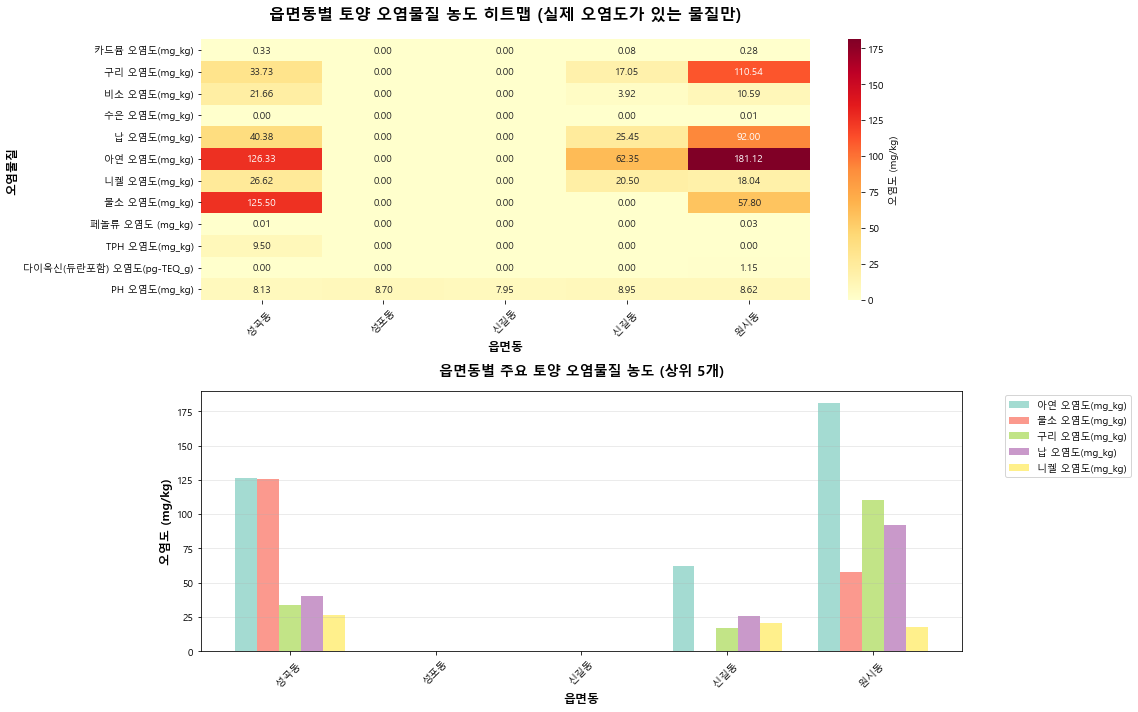

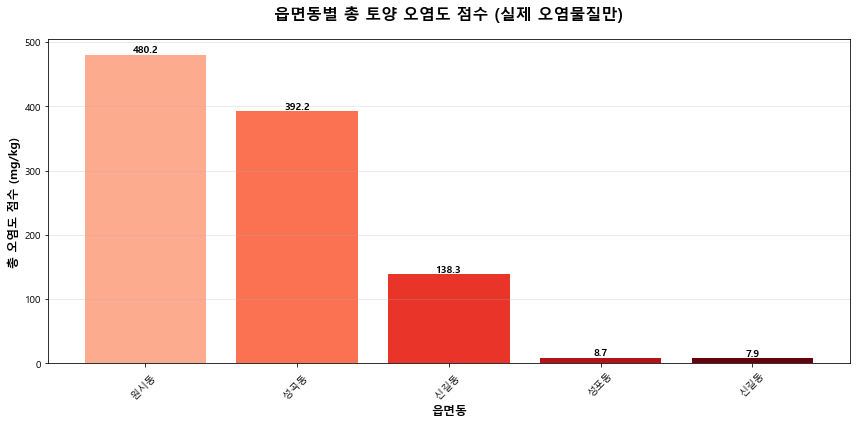

In [81]:
import numpy as np
import seaborn as sns

# 0인 컬럼을 제거한 데이터로 시각화
plt.figure(figsize=(16, 10))

# 히트맵 생성 (필터링된 데이터 사용)
plt.subplot(2, 1, 1)
sns.heatmap(pollution_avg_by_dong_filtered.T, 
            annot=True, 
            fmt='.2f', 
            cmap='YlOrRd', 
            cbar_kws={'label': '오염도 (mg/kg)'})
plt.title('읍면동별 토양 오염물질 농도 히트맵 (실제 오염도가 있는 물질만)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('읍면동', fontsize=12, fontweight='bold')
plt.ylabel('오염물질', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# 주요 오염물질별 막대그래프 (상위 5개 오염물질)
plt.subplot(2, 1, 2)
# 필터링된 데이터에서 전체 평균값이 높은 상위 5개 오염물질 선택
top_pollutants = pollution_avg_by_dong_filtered.mean().nlargest(5)

x = np.arange(len(pollution_avg_by_dong_filtered.index))
width = 0.15
colors = plt.cm.Set3(np.linspace(0, 1, len(top_pollutants)))

for i, (pollutant, _) in enumerate(top_pollutants.items()):
    plt.bar(x + i*width, pollution_avg_by_dong_filtered[pollutant], 
            width, label=pollutant, color=colors[i], alpha=0.8)

plt.title('읍면동별 주요 토양 오염물질 농도 (상위 5개)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('읍면동', fontsize=12, fontweight='bold')
plt.ylabel('오염도 (mg/kg)', fontsize=12, fontweight='bold')
plt.xticks(x + width*2, pollution_avg_by_dong_filtered.index, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 각 읍면동별 총 오염도 점수 계산 (필터링된 오염물질 합계)
total_pollution_score = pollution_avg_by_dong_filtered.sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(total_pollution_score.index, total_pollution_score.values, 
               color=plt.cm.Reds(np.linspace(0.3, 1, len(total_pollution_score))))

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.title('읍면동별 총 토양 오염도 점수 (실제 오염물질만)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('읍면동', fontsize=12, fontweight='bold')
plt.ylabel('총 오염도 점수 (mg/kg)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [82]:
df = pd.DataFrame({
    '읍면동': ['원시동', '성곡동', '신길동', '성포동', '신길동'],
    0: [480.176000, 392.206667, 138.305000, 8.700000, 7.950000]
})

# 병합 규칙 정의
merge_rules = {
    '원시동': '초지동',
    '성곡동': '초지동', 
    '신길동': '원곡동'
}

# 병합 처리
df['읍면동'] = df['읍면동'].map(merge_rules).fillna(df['읍면동'])

# 병합된 동별로 값 합계 계산
merged_df = df.groupby('읍면동')[0].sum().reset_index()
merged_df.columns = ['읍면동', 0]

merged_df

,읍면동,0
0,성포동,8.700000
1,원곡동,146.255000
2,초지동,872.382667


In [85]:
# merged_df의 컬럼명을 표준화
merged_df.columns = ['동', '토양 오염도 점수']

# final_merged_data에서 토양 오염도 점수 관련 컬럼들을 모두 제거
columns_to_drop = [col for col in final_merged_data.columns if '토양 오염도 점수' in col]
if columns_to_drop:
    final_merged_data = final_merged_data.drop(columns=columns_to_drop)

# merged_df와 final_merged_data 병합
final_merged_data = pd.merge(
    final_merged_data, 
    merged_df, 
    on='동', 
    how='left'
).fillna(0)

final_merged_data

,동,음식물 폐기물 총무게,대형폐기물 관리주소 개수,토양오염 관리시설 개수,하천 점용 개수,토양 오염도 점수
0,고잔동,3145708.8,132.0,3.0,0,0.000000
1,대부동,5703940.0,560.0,12.0,0,0.000000
2,반월동,1239451.2,92.0,5.0,1,0.000000
3,백운동,2176200.0,106.7,0.0,0,0.000000
4,본오동,2502583.2,301.0,4.0,0,0.000000
5,부곡동,1739120.8,109.0,3.0,0,0.000000
6,사동,5834368.8,232.0,7.0,0,0.000000
7,선부동,4966509.6,183.0,9.0,0,0.000000
8,성포동,2664230.4,22.0,42.0,0,8.700000
9,안산동,147888.0,86.0,28.0,1,0.000000


In [86]:
# final_merged_data를 CSV 파일로 저장
final_merged_data.to_csv('merged_data.csv', encoding='utf-8-sig', index=False)